In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We are using changed data (which we removed students who applied for 'Bachelor')

In [2]:
df = pd.read_json('../Data2.json')
df.sort_index(inplace=True)
df.head(5)

,accUni,apDegree,apUni,bachelorsAvg,bachelorsUni,country,engExamAnlt,engExamQuan,engExamResult,engExamType,...,extra,field,fund,fundType,masterAvg,masterUni,papersGLOB,papersIRAN,rejUni,year
2,n/a,Doctorate,"Heriot Watt University, Edinburgh",17.74,آزاد اسلامی امیدیه,انگلستان,n/a,n/a,n/a,n/a,...,Award is in GBP.The amount is for living stipe...,Petroleum Engineering,12600,Award,n/a,n/a,4,8,n/a,2007
3,"EPFL Switzerland, Northwestern",Doctorate,Northwestern,15.70,فردوسی مشهد,آمریکا,3,760,100,iBT,...,سال 2008 اومدم آمریکا و دو سال master رو در دا...,Civil Engineering / Transportation,63000,RA,19,Portland State University,8,10,"UC Berkeley, Georgia Tech",2010
5,n/a,Doctorate,Cornell,17.68,اميرکبير,آمریکا,3.5,800,100,iBT,...,تاريخ مصاحبه: 6 مي 2008 و تاريخ کلير شدن: 16 م...,(Management ( Operations Management,59400,TA/RA,18.04,شريف,4,4,"Virginia Tech, INSEAD, MIT Sloan,Cornegie Mell...",2008
6,"Dalhousie, Clemson, TUDelft, NTU-NUS (SINGA sc...",Masters,Chalmers,16.00,صنعتی امیرکبیر,سوئد,3,800,92,iBT,...,رشته لیسانس من مهندسی مکانیک بود. فاند Dalhous...,Nanotechnology,0,n/a,n/a,n/a,0,0,"UC Berkeley, UC Davis, Carneigie Mellon",2008
7,"Carlos III Madrid, FHTW Berlin, Chalmers, Poli...",Masters,"Carlos III Madrid, Spain",7.67,پلی تکنیک بخارست، رومانی - معدل 7.67 از 10,اسپانیا,n/a,n/a,103,iBT,...,رشته ی لیسانس ام مهندسی برق بوده./ ساپورت مالی...,Business Administration and Quantitative Methods,24500,TA,n/a,n/a,0,0,Chalmers,2008


In [3]:
df['papersIRAN'].value_counts().sort_index()

0     2242
1      484
2      299
3      175
4      104
5       69
6       24
7       31
8       26
9       10
10      22
11       5
12       8
13       3
14       3
15       7
17       1
18       2
19       1
20       4
21       2
25       1
27       1
30       1
54       1
Name: papersIRAN, dtype: int64

In [4]:
df[df['papersIRAN']>15]['apDegree'].value_counts()

Doctorate    12
Masters       2
Name: apDegree, dtype: int64

In [5]:
df['papersGLOB'].value_counts().sort_index()

0     1880
1      519
2      338
3      263
4      155
5      104
6       68
7       51
8       31
9       17
10      26
11       9
12      13
13       4
14       8
15       7
16       5
17       5
18       3
19       2
20       4
23       3
24       1
25       1
26       1
27       1
30       3
32       2
39       1
43       1
Name: papersGLOB, dtype: int64

In [6]:
df[df['papersGLOB']>10]['apDegree'].value_counts()

Doctorate    67
Masters       7
Name: apDegree, dtype: int64

# Don't Have Any Paper

In [10]:
na=df[(df['papersGLOB']==0) & (df['papersIRAN']==0)]['apDegree'].value_counts()
na

Masters      1147
Doctorate     345
Name: apDegree, dtype: int64

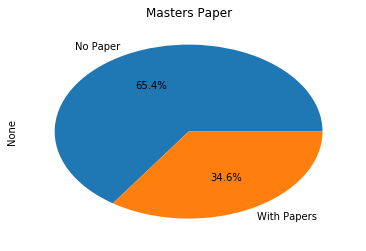

In [11]:
pd.Series((na.Masters,df[df.apDegree=='Masters'].count()[0]-na.Masters),index=['No Paper','With Papers']).plot(autopct='%1.1f%%',kind='pie')
plt.title('Masters Paper')
plt.show()

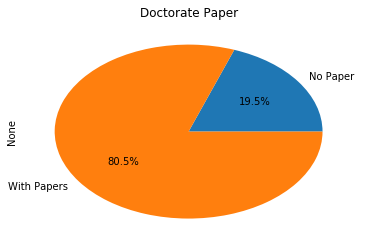

In [12]:
pd.Series((na.Doctorate,df[df.apDegree=='Doctorate'].count()[0]-na.Doctorate),index=['No Paper','With Papers']).plot(autopct='%1.1f%%',kind='pie')
plt.title('Doctorate Paper')
plt.show()

In [14]:
(df.papersGLOB+df.papersIRAN).describe()

count    3526.000000
mean        2.760068
std         4.594755
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        56.000000
dtype: float64